<div class="alert alert-block alert-warning">
<center><b>【第五阶段】项目日志</b></center>
    
    
第五阶段：【特征工程全解析】
   
第五节阶段核心目的：全方面掌握特征工程的实用手段和适用场景
    
难度（最高5星）：⭐⭐⭐⭐


Good Luck!
</div>

# 特征工程

什么是特征工程？

特征工程仿佛是个很神秘的存在，在这一阶段，我们将从对数据的understanding转变为将自己对数据本身的insights灌入，在使用不同手段将原始特征进行转换后成为更有价值、更能解释数据、能反映更多数据信息的特征。

一般，我们会先想办法拓宽特征池，就是说白了想办法把原来的一个特征拆解为多个特征，典型的例子就是，将时间数据拆成年、月、日、是否为工作日、是否是节假日等等维度，从而增加数据维度，那么还有什么办法拓宽特征池呢？

我们后面的教程会为大家一一介绍~

那么，为什么特征工程这么重要呢？

这是我们建模最重要的预步骤，也是从数据层面提升模型表现的重要一环，其实数据科学家大部分的时间都是围着数据转的，真正纯纯玩模型调参的还是不多。

---


因为业务建模通常需要尽快有一个快速的输出，而各种各样特征工程的探索一般比较耗时，往往在后期优化中进行，下面分别介绍如下几种：

- categorical 变量处理方法（encoding）
- 数据分箱（binning）
- 数据转换（transformation）
- 增强合并（Enhancement&Combination）
- 特征选择（Selection）

特征工程
- [Encoding](#Encoding)
    - [编码简介](#编码简介)
    - [LabelEncoder](#LabelEncoder)
    - [OrdinalEncoder](#OrdinalEncoder)
    - [OneHotEncoder](#OneHotEncoder)
    - [TargetEncoder](#TargetEncoder)
- [Binning](#Binning)
    - [分箱简介](#分箱简介)
    - [无监督分箱](#无监督分箱)
    - [有监督分箱](#有监督分箱)
    - [特征分箱的好处](#特征分箱的好处)
- [Transformation](#Transformation)
    - [Standardization](#Standardization)
    - [Normalization](#Normalization)
    - [标准化与归一化对比](#标准化与归一化对比)
    - [统计变换](#统计变换)
- [Enhancement&Combination](#Enhancement&Combination)
    - [特征交互](#特征交互)
    - [PCA](#PCA)
    - [GBDT+LR](#GBDT+LR)
- [Selection](#Selection)
    - [基于统计指标](#基于统计指标)
    - [基于模型指标](#基于模型指标)
        

In [1]:
# import packages

# data processing
import pandas as pd
import numpy as np
from datetime import timedelta, datetime


import re

# data visualization
import plotly.graph_objs as go
from plotly.graph_objs import Bar, Layout
from plotly import offline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 10)

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

# change text color
import colorama
from colorama import Fore, Style

# IPython
from IPython.display import IFrame

from sklearn.feature_selection import mutual_info_classif

%matplotlib inline

In [9]:
# 读取数据
train_idx = pd.read_csv("../../data/train_clean.csv",index_col=0).index
test_idx = pd.read_csv("../../data/test_clean.csv",index_col=0).index

In [7]:
fullset = pd.read_csv("../../data/fullset_update.csv",index_col=0)

C:\Users\gzjgz\AppData\Roaming\Python\Python37\site-packages\numpy\lib\arraysetops.py:580: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [11]:
train = fullset.loc[train_idx]
test = fullset.loc[test_idx]

In [12]:
from data_management import meta

In [13]:
metadata = meta(train,test)

## Encoding

让机器理解特征。

> 在统计学中，分类特征是可以采用有限且通常固定数量的可能值之一的变量，基于某些定性属性将每个个体或其他观察单元分配给特定组或名义类别。

简单来说，编码就是把原始数据转换为机器、算法能理解的输入。

### LabelEncoder

> Encode target labels with value between 0 and n_classes-1.

```

通常我们使用LabelEncoder来转换编码数据中的nominal变量。

比如：性别，男、女。

我们可以把男编码为0，女编码为1。

那么什么时候要去使用LabelEncoder呢？

（1）nominal变量是一个binary的变量，比如性别。
（2）对二分类的target编码
（3）变量是ordinal的

什么时候不要用？
（1）nominal变量含有多个class
（2）变量本身不存在比较关系，类别互相独立
```

那么，我们再来看看OrdinalEncoder。

### OrdinalEncoder

> Encode categorical features as an integer array.

OrdinalEncoder主要是转换ordinal，ordinal变量就是带有比较关系的nominal变量。

这样会比较make sense，因为0<1<2<3，那么如果数字所对应的的原始class也满足这种顺序关系，会更合理。

所以，貌似LabelEncoder和OrdinalEncoder是一样的啊，没啥区别！

> ANSWER: 
>
> both have the same functionality. A bit difference is the idea behind. OrdinalEncoder is for converting features, while LabelEncoder is for converting target variable.That's why OrdinalEncoder can fit data that has the shape of `(n_samples, n_features)` while LabelEncoder can only fit data that has the shape of `(n_samples,)` (though in the past one used LabelEncoder within the loop to handle what has been becoming the job of OrdinalEncoder now)


其实本身数据已经做了label encoding了，类别型数据已经用整数来去替换了。

优点：简单易懂、不增加数据维度、对树形模型友好。
缺点：没有提取数据的信息、不适合线性模型、默认类别之间的序列关系(ordinal encoding解决这个问题）。

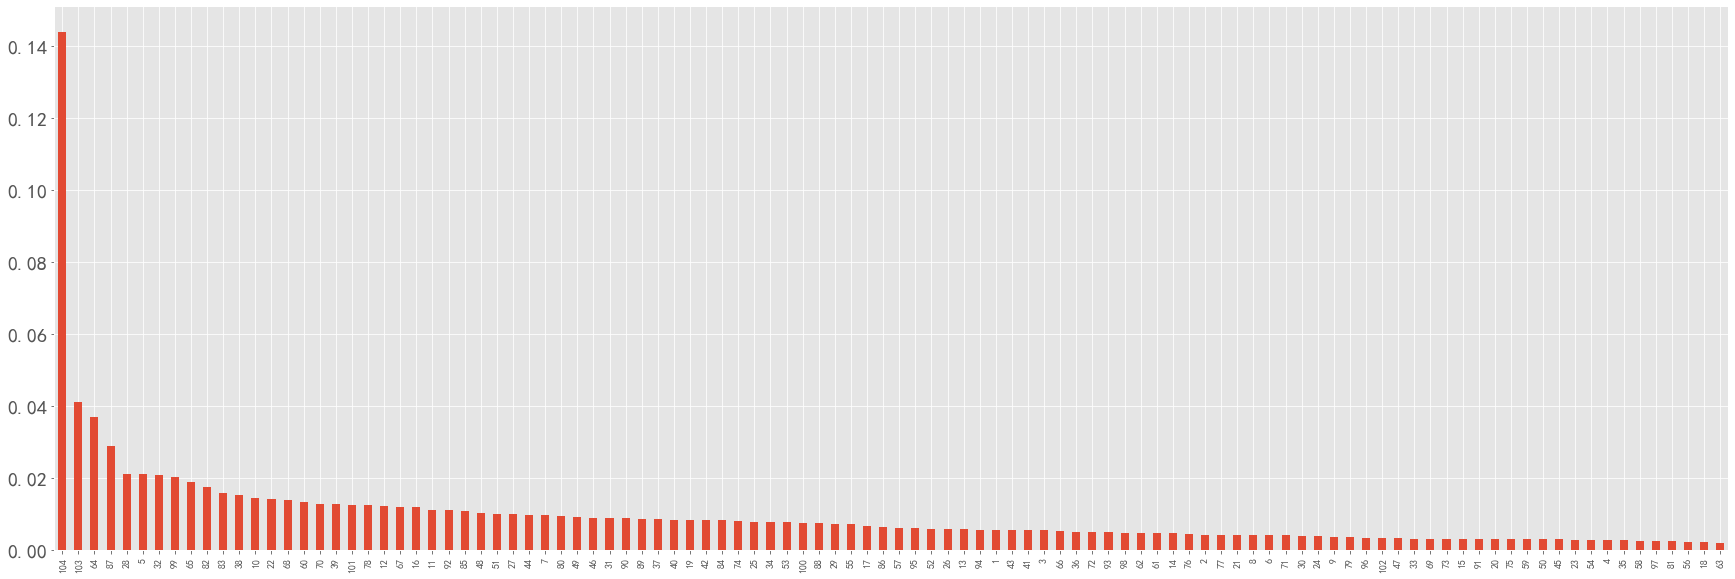

In [14]:
(fullset.ps_car_11_cat.value_counts()/fullset.shape[0]).plot(kind='bar',figsize = [30,10])
plt.tick_params(axis='y', which='major', labelsize=20)

这一列是nominal的，离散型变量，并且dominant的一类：104（虽然我不懂什么意思），占据整个类别的15%左右，所以我不能认为这一类完全压过了其他类，从而可以忽视其他类别的研究，而且这一列有104个唯一值数量，并且不存在顺序关系。

那么这个时候对这种唯一值过多的列如何编码，就成问题了！

### OneHotEncoder

链接：https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html


> Encode categorical features as a one-hot numeric array.

In [15]:
nominal_cols = metadata[(metadata.level == 'nominal') & (metadata.keep == True)].index.tolist()
nominal_cols

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [16]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore",sparse=False)
trn_nominal_cols_enc = enc.fit_transform(train[nominal_cols])
tst_nominal_cols_enc = enc.transform(test[nominal_cols])

In [17]:
trn_nominal_cols_enc.shape

(144626, 177)

In [18]:
tst_nominal_cols_enc.shape

(892816, 177)

下面来具体看看`OneHotEncoder`怎么使用吧！

In [19]:
enc = OneHotEncoder(handle_unknown='ignore')
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [20]:
# 展示每一类的category
enc.categories_

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]

In [21]:
enc.transform([['Female', 1], ['Male', 4]]).toarray()

array([[1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [22]:
enc.inverse_transform([[0, 1, 1, 0, 0], [0, 0, 0, 1, 0]])

array([['Male', 1],
       [None, 2]], dtype=object)

In [23]:
enc.get_feature_names_out(['gender', 'group'])

array(['gender_Female', 'gender_Male', 'group_1', 'group_2', 'group_3'],
      dtype=object)

<div class="alert alert-block alert-success"><b>Step 1</b>: 
    
- 叙述一下上面这个例子的实现过程，以及`handle_unknown='ignore'`的作用
- 查一下get_dummies和onehotencoder的使用方法的区别和注意事项
</div>


看下图👇👇👇

来自我的小红书作品：http://xhslink.com/AYivVf 【请移步到我的作品中查看细节哦！】

当变量类型是ordinal，我们可以用OrdinalEncoder或者LabelEncoder去编码。
当变量类型是nominal，我们可以用OneHotEncoder去编码。
但是当这一列的唯一值过多，一列就变成了104列，再加上其他经过编码的列，整个数据的维度就会爆炸，从原来的60维上升到几百维这样，极大影响了后续建模的过程。

**总结：**

- 当变量类型是`ordinal`，我们可以用`OrdinalEncoder`或者`LabelEncoder`去编码。
- 当变量类型是`nominal`，我们可以用`OneHotEncoder`去编码。

但是当这一列的唯一值过多，一列就变成了104列，再加上其他经过编码的列，整个数据的维度就会爆炸，从原来的60维上升到几百维这样，极大影响了后续建模的过程

### Label Encoding
其实本身数据已经做了label encoding了，类别型数据已经用整数来去替换了。

### Onehot Encoding(dummy encoding)

比如下图，本来有3类数据，那么我就把一列扩充为三列，然后遍历每一行，如果该行关于这一列的值，原来是`private`,那么在新的3列之中，只有`WorkClassPrivate`这一列设置为1，其他2列为0，以此类推。


[![bQBUqH.png](https://s4.ax1x.com/2022/03/01/bQBUqH.png)](https://imgtu.com/i/bQBUqH)


### TargetEncoder

就是把类别替换成target关于这一类的均值。

[![bQDkeH.png](https://s4.ax1x.com/2022/03/01/bQDkeH.png)](https://imgtu.com/i/bQDkeH)

先把每一类groupby，然后计算每一组的mean，然后替换。

<div class="alert alert-block alert-success"><b>Step 2</b>: 
    
分析说明上述三个方法的优缺点
</div>

In [24]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # 集散这一列关于target的group mean
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # 平滑
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # 计算所有target的mean
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    # 如果某一类别的值的个数特别多，比如104这一类就有21255行，那么我们就要削减其关于target的mean的权值。
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    
    # 分别对train和test计算mean
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

<div class="alert alert-block alert-success"><b>Step 2</b>: 
    
理解以上的代码，并阐述target encoding的优缺点以及如何减少数据泄露的？
    
</div>

In [25]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)

In [26]:
train["ps_car_11_cat_tar_enc"] = train_encoded.astype('float64')
test['ps_car_11_cat_tar_enc'] = test_encoded.astype('float64')

In [27]:
cols_to_drop = metadata[metadata['imputation'] == 'remove'].index.tolist()

In [28]:
cols_to_drop.append('ps_car_11_cat')

In [29]:
train_clean = train.drop(cols_to_drop,axis=1)

In [30]:
test_clean = test.drop(cols_to_drop,axis=1)

In [ ]:
train_clean.to_csv('train_clean.csv')
test_clean.to_csv('test_clean.csv')

In [31]:
fullset = pd.concat([train_clean,test_clean],ignore_index=True)

In [32]:
continuous_cols = metadata[(metadata.level == 'interval')|(metadata.level == 'ratio') & (metadata.keep == True)].index.tolist()

<AxesSubplot:>

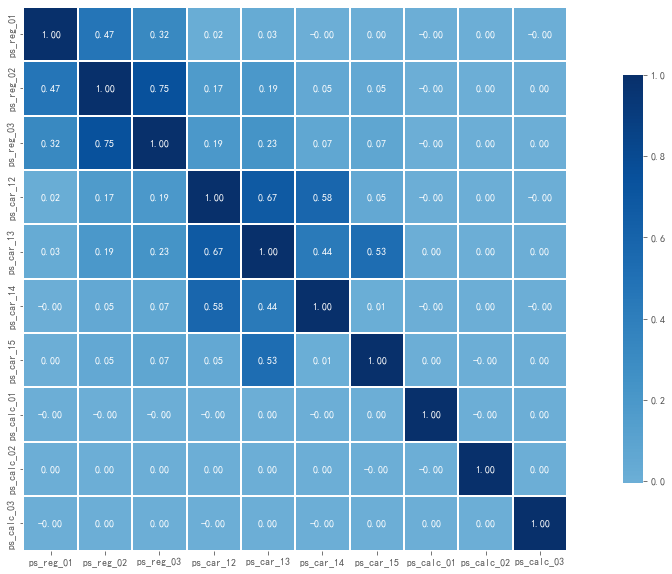

In [33]:
plt.figure(figsize = [20,10])   # 设置画布大小
sns.heatmap(data = fullset[continuous_cols].corr(), 
            vmax=1,
            center=0,
            square=True,
           annot = True,  # 显示文字
          fmt='.2f',      # 保留两位
           cmap = 'Blues',   # 颜色
           linewidths = .3,  # 分割线宽度
           cbar_kws={"shrink": .75})

![](https://miro.medium.com/max/1225/1*MAr4rWj6zw0Rdo01ecZu1A.png)

> Feature Binning: Conversion of a continuous variable to categorical.
>
>Feature Encoding: Conversion of a categorical variable to numerical features.

## 分箱

### 分箱简介

先来讲讲什么是分箱算法，根据字面意思就是

把数据按照不同的【规则】分到不同的【箱子】里。

其实分箱是特征工程的一种，可以理解为一种**连续数据**变为**离散数据**的建模方式。

 

> 举例：比如有一组连续数据，比如为`25，14，68，43，63`。假设数据的分箱逻辑是大于50为0，小于50为1，那么最终数据会变成1，1，0，1，0，数据就离散化了。当然分箱有很多方式，大致作用就是把连续数据按照一定的规则离散化。

### 无监督分箱

> Unsupervised binning are of two categories without considering the target class label into account:

（1）等频分箱（Equal frequency binning）

该算法将连续变量划分为具有相同宽度的 bin。

> 从最小值到最大值之间，均分为 $N$ 等份。 如果 min,max为最小最大值，则每个区间的长度为 $W=(max−min)/N$ ，则区间边界值为min+W，min+2W，…. min+(N−1)W 。这里只考虑边界，每个等份的实例数量可能不等。

（2）等距分箱（Equal Width Binning）

该算法将数据划分为具有大致相同数量的类别。数据的值平均分配到形成的类别中。

> 区间的边界值要经过选择，使得每个区间包含大致相等的实例数量。比如说 N=10 ,每个区间应该包含大约10%的实例。

$$freq = \frac{N}{n}$$

```diff
@ n = number of categories
@ freq = frequency of a category
@ N = number of values in data
```

### 有监督分箱

> 基于熵的分箱算法对分箱或类别中的大多数值属于同一类标签的连续或数值变量进行分类。它计算目标类标签的熵，并根据最大信息增益对拆分进行分类。




### 特征分箱的好处
 
其优点等同于数据离散化的好处：

- 离散特征的增加和减少都很容易，易于模型的快速迭代；

- 稀疏向量内积乘法运算速度快，计算结果方便存储，容易扩展；

- 离散化后的特征对异常数据有很强的鲁棒性；

  比如一个特征是年龄>30是1，否则0。

  如果特征没有离散化，一个异常数据“年龄300岁”会给模型造成很大的干扰；

- 对于线性模型，表达能力受限；

  单变量离散化为N个后，每个变量有单独的权重，相当于模型引入了非线性，能够提升模型表达能力，加大拟合；

- 离散化后可以进行特征交叉，由M+N个变量变为M*N个变量，进一步引入非线性，提升表达能力；

- 特征离散化后，模型会更稳定；

  比如如果对用户年龄离散化，20-30作为一个区间，不会因为一个用户年龄长了一岁就变成一个完全不同的人。

  当然处于区间相邻处的样本会刚好相反，所以怎么划分区间是门学问；

- 特征离散化以后，起到了简化了逻辑回归模型的作用，降低了模型过拟合的风险；

- 可以将缺失作为独立的一类带入模型；

- 将所有变量变换到相似的尺度上。

In [34]:
import pandas as pd
value_list = [0, 10, 20, 59, 61, 79, 80, 90, 99, 100]

# 等频分箱
value_freq_bins = pd.qcut(value_list, q=5)
# 等距分箱
value_dis_bins = pd.cut(value_list, bins=5)

<div class="alert alert-block alert-success"><b>Step 3</b>: 
    
- Find the unique categories for this categorical
- Find the integer positions, which point to the categories of this
    categorical
    
</div>

In [35]:
"你的代码"

'你的代码'

<AxesSubplot:ylabel='Count'>

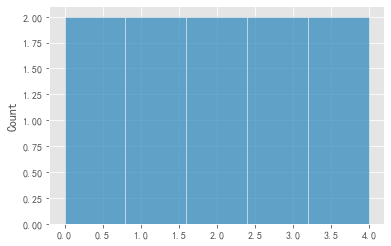

In [36]:
sns.histplot(value_freq_bins.codes)

<AxesSubplot:ylabel='Count'>

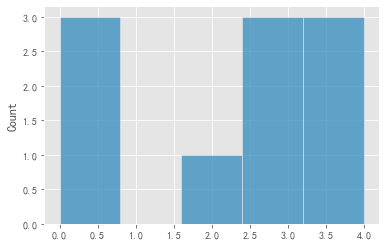

In [37]:
sns.histplot(value_dis_bins.codes)

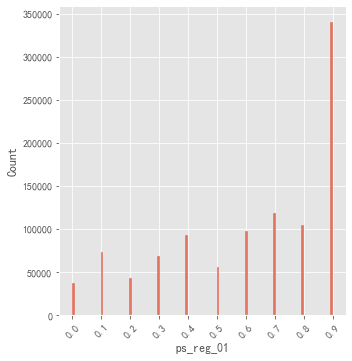

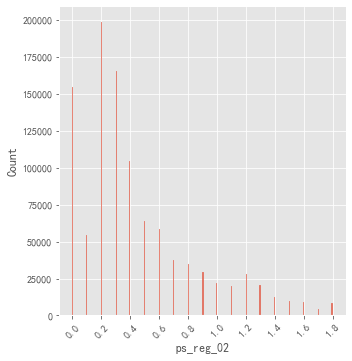

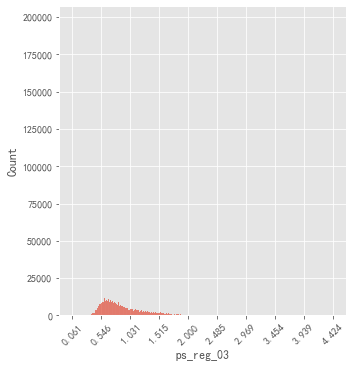

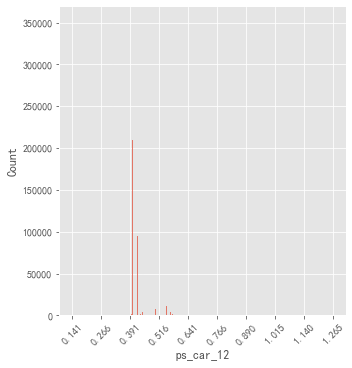

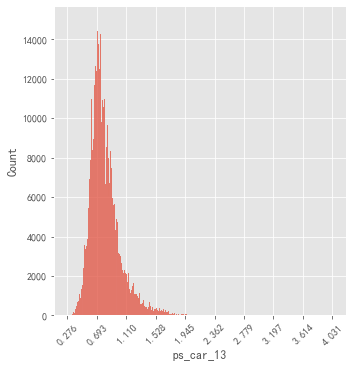

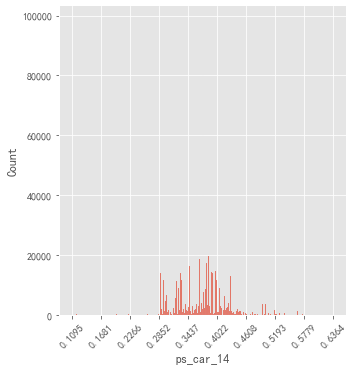

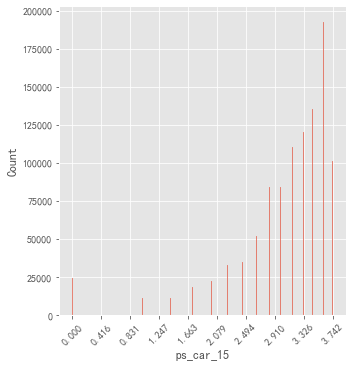

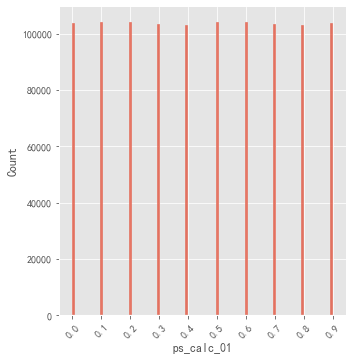

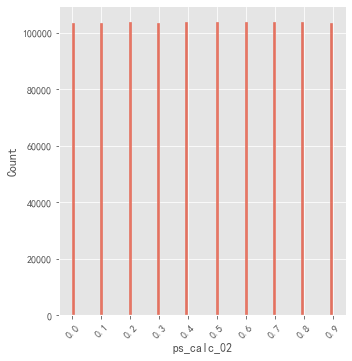

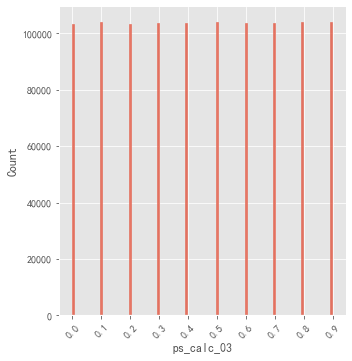

In [38]:
for col in continuous_cols:
    sns.displot(fullset[col])
    plt.xticks(ticks = np.linspace(start = fullset[col].min(),
                                  stop = fullset[col].max(),
                                  num = 10),rotation = 45)

感觉有一些变量虽然是连续型的，但是并不是会形成传统意义上的概率分布，还会有离散型数据的性质出现，并且有很多尖峰的情况，普遍对应着肥尾。

所以我们尝试采用特征离散化，来强化突出特征的关键性信息（主要集中在尖峰附近），并简化特征，避免过拟合。

同时避免丢失离群值（离群值无法定义为异常值，并不是分布的异常就说明其不合理性，在此没有更多的evidence证明，所以不剔除离群值）

好好看看这个！

- 风控模型—WOE与IV指标的深入理解应用：https://zhuanlan.zhihu.com/p/80134853

<div class="alert alert-block alert-success"><b>Step 4</b>: 
    
1. WOE的意义
2. 如何计算WOE
3. WOE编码的意义
    
</div>

In [39]:
def woe_iv_encoding(data, feat, target, max_intervals, verbose = False):
    
    feat_bins = pd.qcut(x = data[feat], q = max_intervals, duplicates='drop')
    gi = pd.crosstab(feat_bins,data[target])
    gb = pd.Series(data=data[target]).value_counts()

    bad = 
    good = 

    # 计算woe
    woe = 

    # 计算iv
    iv = 
    # 计算整个特征的iv
    f_iv = iv.sum()  # 5.2958917587905745
    if verbose == True:
        print(f"根据当前的间隔数{max_intervals}，特征{feat}所计算的总information value为：{f_iv}")
        print('='*80)

    # 进行映射操作
    dic = iv.to_dict()

    iv_bins = feat_bins.map(dic)  # 连续型变量离散化

    return iv_bins.astype('float64')

![](https://miro.medium.com/max/1156/1*5S_5aAHWe0_knDGZUK3W8w.png)

In [40]:
for col in continuous_cols:
    fullset[f"{col}_woe"] = woe_iv_encoding(data = fullset, feat = col, target = 'target', max_intervals = 20)
    #sns.displot(fullset_copy[f"{col}_woe"])

---
该示例比较了线性回归（线性模型）和决策树（基于树的模型）的预测结果（是否特征离散化）

如离散化之前的结果所示，线性模型构建速度快，解释相对简单，但只能建模线性关系，而决策树可以构建更复杂的数据模型。使线性模型在连续数据上更强大的一种方法是使用离散化（也称为分箱）。在示例中，我们将特征离散化并对转换后的数据进行 one-hot 编码。请注意，如果 bin 不够宽，过度拟合的风险似乎会大大增加，因此通常应在交叉验证下调整离散化器参数。

离散化后，线性回归和决策树做出完全相同的预测。由于每个 bin 内的特征都是恒定的，因此任何模型都必须为 bin 内的所有点预测相同的值。与离散化之前的结果相比，线性模型变得更加灵活，而决策树变得更加不灵活。请注意，分箱特征通常对基于树的模型没有有益影响，因为这些模型可以学习在任何地方拆分数据。

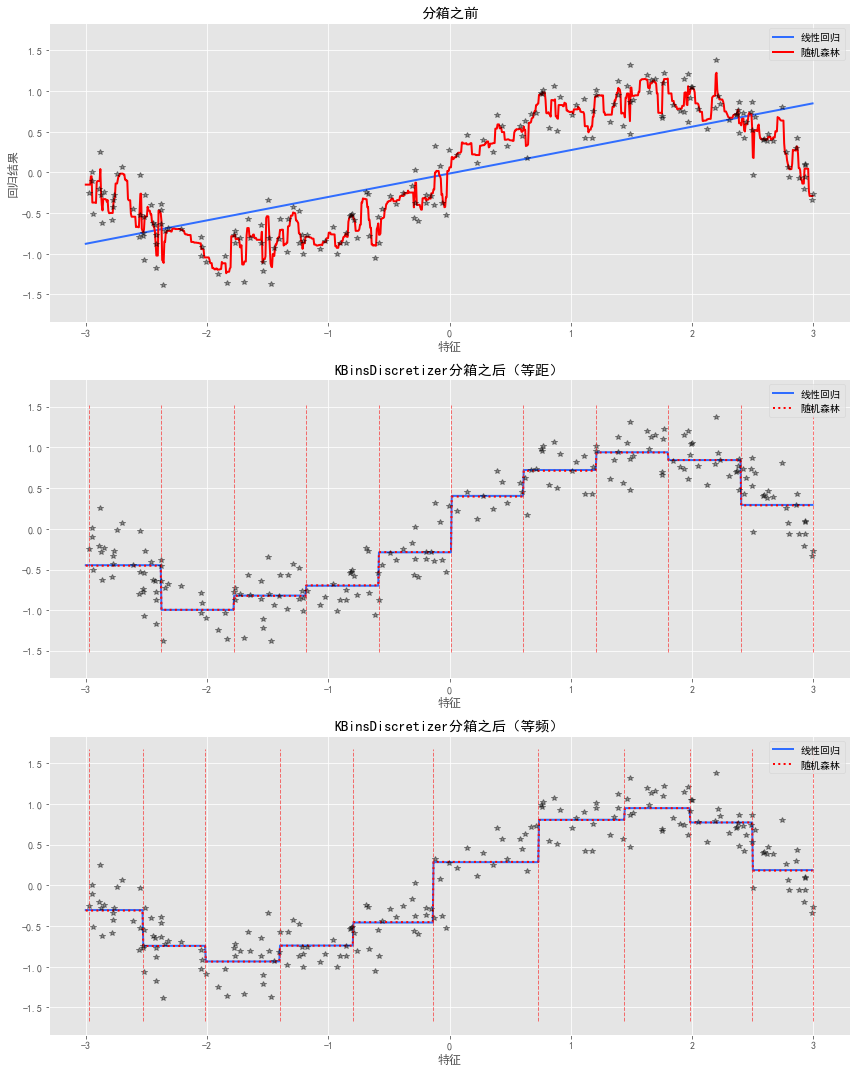

In [41]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestRegressor

# construct the dataset
rnd = np.random.RandomState(2022)
X = rnd.uniform(-3, 3, size=200)
y = np.sin(X) + rnd.normal(size=len(X)) / 4
X = X.reshape(-1, 1)

# transform the dataset with KBinsDiscretizer
enc1 = KBinsDiscretizer(n_bins=10, encode="onehot", strategy = 'uniform')
enc2 = KBinsDiscretizer(n_bins=10, encode="onehot", strategy = 'quantile')
X_binned_unif = enc1.fit_transform(X)
X_binned_quan = enc2.fit_transform(X)

# predict with original dataset
fig, (ax1, ax2, ax3) = plt.subplots(ncols=1,nrows = 3, sharey=True, figsize=(12,5*3))
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = LinearRegression().fit(X, y)


ax1.plot(line, reg.predict(line), linewidth=2, color="#306dff", label="线性回归")
reg = RandomForestRegressor(random_state=0).fit(X, y)
ax1.plot(line, reg.predict(line), linewidth=2, color="red", label="随机森林")
ax1.plot(X[:, 0], y, "*", c="k",alpha = .4)
ax1.legend(loc="best")
ax1.set_ylabel("回归结果")
ax1.set_xlabel("特征")
ax1.set_title("分箱之前")

# predict with transformed dataset
line_binned_unif = enc1.transform(line)
reg = LinearRegression().fit(X_binned_unif, y)
ax2.plot(
    line,
    reg.predict(line_binned_unif),
    linewidth=2,
    color="#306dff",
    linestyle="-",
    label="线性回归",
)

reg = RandomForestRegressor(random_state=0).fit(X_binned_unif, y)
ax2.plot(
    line,
    reg.predict(line_binned_unif),
    linewidth=2,
    color="red",
    linestyle=":",
    label="随机森林",
)
ax2.plot(X[:, 0], y, "*", c="k", alpha = .4)
ax2.vlines(enc1.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1,alpha= .6, color = '#fc1b1b',linestyles = '--')
ax2.legend(loc="best")
ax2.set_xlabel("特征")
ax2.set_title("KBinsDiscretizer分箱之后（等距）")

# predict with transformed dataset
line_binned_quan = enc2.transform(line)
reg = LinearRegression().fit(X_binned_quan, y)
ax3.plot(
    line,
    reg.predict(line_binned_quan),
    linewidth=2,
    color="#306dff",
    linestyle="-",
    label="线性回归",
)

reg = RandomForestRegressor(random_state=0).fit(X_binned_quan, y)
ax3.plot(
    line,
    reg.predict(line_binned_quan),
    linewidth=2,
    color="red",
    linestyle=":",
    label="随机森林",
)
ax3.plot(X[:, 0], y, "*", c="k", alpha = .4)
ax3.vlines(enc2.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha= .6, color = '#fc1b1b',linestyles = '--')
ax3.legend(loc="best")
ax3.set_xlabel("特征")
ax3.set_title("KBinsDiscretizer分箱之后（等频）")

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"><b>Step 5</b>: 
    
- 根据上图，完善代码！
- 请叙述 pd.qcut 和 pd.cut 的区别，我们在变量离散化时用哪个更好？
- pd.qcut 和 pd.cut 和 KBinsDiscretizer 的区别？
- 根据这个例子你有什么启发？（开放）
    
</div>

## 特征转换


### Standardization

![](https://miro.medium.com/max/1400/1*UPLv3kNw9JTtNabr70dQDQ.png)

feature scaling 的一种！

> 标准化的前提是特征值服从正态分布，标准化后，其转换成标准正态分布。Standardization is the process of developing, promoting and possibly mandating standards-based and compatible technologies and processes within a given industry.

sklearn实现：https://scikit-learn.org/stable/modules/preprocessing.html

因此，我们所有的特征现在都将具有零均值和单位方差，这意味着我们现在可以比较特征之间的方差。

换句话说，对于数据集中的每个样本，我们减去均值 $\mu$ 并除以标准差 $\sigma$。

$$\frac{x-\mu}{\sigma}$$

通过从每个样本中移除均值，我们有效地将样本移向均值 0（毕竟，我们从所有样本中移除了它）。此外，通过除以标准差，我们得到一个数据集，其中的值描述了它们偏离平均值的标准差多少。

```python
import numpy as np
dataset = np.array([1.0, 2.0, 3.0, 3.0, 3.0, 2.0, 1.0])
standardized_dataset = (dataset - np.average(dataset)) / (np.std(dataset))
print(standardized_dataset)
```

优点：
1. z-score计算简单
2. 不受数据量级影响

缺点：

1. 总体均值和方差很难估算
2. 需要数据呈正态分布
3. 去除数据实际意义，需要`inverse_transform`

---

### Normalization

![](https://miro.medium.com/max/1225/1*GkLMjpUYVYWQdy69psVbEw.png)

feature scaling 的一种！


sklearn实现：https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html


```python
import numpy as np
dataset = np.array([1.0, 12.4, 3.9, 10.4])
normalized_dataset = (dataset - np.min(dataset)) / (np.max(dataset) - np.min(dataset))
print(normalized_dataset)
```

优点：
1. 计算简单

缺点：
1. 对异常值敏感
2. 新数据加入，min和max要重新定义

### 标准化与归一化对比

（1）标准化与归一化的异同

**相同点：** 
- 都能取消由于量纲不同引起的误差
- 都是线性变换
- 都是对向量X按照比例压缩再进行平移
- 都需要inverse_transform

**不同点：**

- 目的不同
    - 归一化是为了消除纲量压缩到`[0,1]`区间； 
    - 标准化只是调整特征整体的分布；
- 假设不同
    - 归一化没有假设
    - 标准化需要数据呈正态分布
- 
- 计算逻辑不同
    - 归一化与最大，最小值有关； 
    - 标准化与均值，标准差有关；
- 输出范围不同
    - 归一化输出在`[0,1]`之间； 
    - 标准化无限制。

（2）什么时候用归一化？什么时候用标准化？

- 如果对输出结果范围有要求，用归一化
- 如果数据较为稳定，不存在极端的最大最小值，用归一化
- 如果数据存在异常值和较多噪音，用标准化

（3）归一化与标准化的应用场景

- 在分类、聚类算法中，需要使用距离来度量相似性的时候（如SVM、KNN）、或者使用PCA技术进行降维的时候，标准化(Z-score standardization)表现更好；
- 在不涉及距离度量、协方差计算、数据不符合正太分布的时候，可以使用第一种方法或其他归一化方法。 
- 基于树的方法不需要进行特征的归一化。 例如随机森林，bagging与boosting等方法。 如果是基于参数的模型或者基于距离的模型，因为需要对参数或者距离进行计算，都需要进行归一化。

**一般来说，建议优先使用标准化。对于输出有要求时再尝试别的方法，如归一化或者更加复杂的方法。很多方法都可以将输出范围调整到[0, 1]，如果我们对于数据的分布有假设的话，更加有效的方法是使用相对应的概率密度函数来转换。**

**除了上面介绍的方法外，还有一些相对没这么常用的处理方法：RobustScaler、PowerTransformer、QuantileTransformer和QuantileTransformer等。**

参考：https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

### 统计变换

作用：
1. 稳定方差
2. 始终保持分布接近于正态分布
3. 使数据与分布的平均值无关
4. 适用于倾斜分布

![](https://www.researchgate.net/profile/Matthieu-Komorowski-2/publication/308007227/figure/fig20/AS:668378712772624@1536365311541/Example-of-the-effect-of-a-log-transformation-on-the-distribution-of-the-dataset.png)

其他：
1. Square Root Transformation
2. Cube Root Transformation
3. Box-Cox：https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html


> By performing these transformations, the dataset typically becomes more normally distributed.


## Enhancement

关于特征增强，可以考虑两个方向：

（1）增加有用的特征：

- 通过业务常识去造特征
> 比如时间特征展开拆解，想办法拓宽特征池
- 特征交互
> 交互组合产生新的特征

（2）去掉有害的特征，即特征降维

- 从原始特征集中去掉部分特征，这部分技术通常称为特征选择；
- 将原始特征集映射为一个新的低维特征集，从而过滤掉高维空间中的噪声，这部分技术可以称为特征变换

### 特征交互

鉴于变量之间的较强相关性，我不能把他们都带入模型中，因为相关特征不能提升模型表现，对于：

1. 线性模型

会出现多重共线性的问题，从而导致解析解的波动较大，方差较大，不稳定。

2. 树形模型

树形模型基于各特征的信息增益对其分割，适合处理不同特征之间的交互性，但是高相关性会掩盖其中的【交互性】。

- Feature correlation

特征的相关性是说，不考虑target，两个特征之间是互相依赖的，或者说，如果我增大特征A的值，特征B的值也会发生线性的变化（变大或者变小）。

- Feature Interaction

特征交互性是说，现在有两个不相关的特征，比如：房子大小（特征A）和房子的位置（特征B），他们并不相关，我们的target是房价（要去预测的），那么这俩特征交互起来，或者说以某种方式合并起来，是不是会有`1+1>2`的效果，比如基本的【加减乘除】的组合。

所以总结起来：

![](https://gitee.com/gzjzg/WhaleDataScienceProject/raw/master/pic/interaction.png)

In [42]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

interactions = pd.DataFrame(data=poly.fit_transform(fullset[continuous_cols]), 
                            columns=poly.get_feature_names_out(continuous_cols))


interactions.drop(continuous_cols, axis=1, inplace=True)  # Remove the original columns
# Concat the interaction variables to the train data
print('特征交互前，训练集有 {}个变量 '.format(fullset.shape[1]))
fullset = pd.concat([fullset, interactions], axis=1)
print('特征交互后，训练集有 {}个变量'.format(fullset.shape[1]))

特征交互前，训练集有 67个变量 
特征交互后，训练集有 112个变量


<div class="alert alert-block alert-success"><b>Step 6</b>: 
    
- 简述【特征交互】的意义和原理
- 请叙述 PolynomialFeatures 的 degree、interaction_only、include_bias的含义
    
</div>

### PCA

参考：

- sklearn实现：https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- 通俗理解pca：https://blog.csdn.net/HLBoy_happy/article/details/77146012
- pca原理总结：https://www.cnblogs.com/pinard/p/6239403.html

In [45]:
train

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_car_11_cat_tar_enc
0,744529,0.0,2,1,9,1,0,0,0,1,...,1,2,8,0,0,1,0,0,0,0.179890
1,673907,0.0,1,1,2,1,0,0,1,0,...,4,4,9,1,1,1,1,1,0,0.189300
2,730796,0.0,7,1,6,0,4,0,0,0,...,1,3,7,0,1,1,0,0,0,0.104350
3,306142,0.0,1,1,3,0,0,1,0,0,...,0,2,9,0,0,1,0,0,0,0.177145
4,1102701,0.0,6,2,7,1,0,0,1,0,...,0,2,9,0,0,1,1,0,1,0.125742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144621,1487473,1.0,5,1,7,0,3,0,0,1,...,1,5,7,0,1,1,0,0,0,0.181061
144622,1487566,1.0,1,1,5,0,0,0,0,1,...,2,1,5,0,1,0,0,0,0,0.171277
144623,1487716,1.0,0,1,6,1,0,0,1,0,...,2,1,6,0,1,1,0,0,0,0.182425
144624,1487748,1.0,0,2,2,0,0,1,0,0,...,0,4,4,0,0,1,0,1,0,0.180763



PCA执行中...
Total Explained variance: 0.9948


Text(0, 0.5, '第二主成分解释 2.5 % 方差')

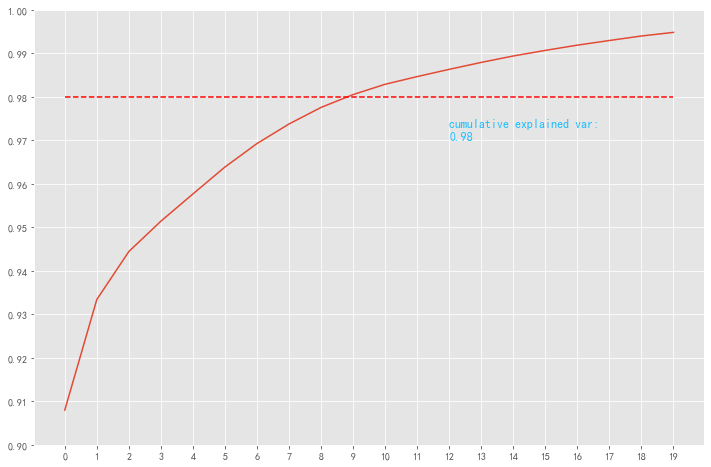

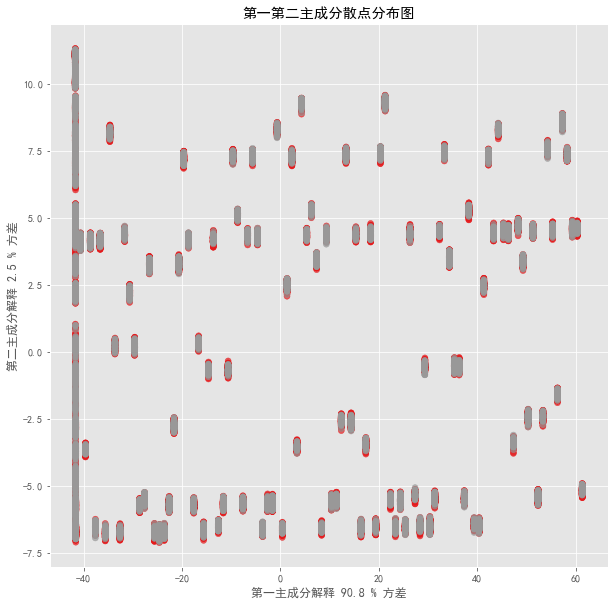

In [46]:
from sklearn.decomposition import PCA

X = train.drop(['id', 'target'], axis=1)
y = train.target

n_comp = 20
print('\nPCA执行中...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(X)
print('Total Explained variance: %.4f' % pca.explained_variance_ratio_.sum())


plt.figure(figsize = [12,8])

pd.Series(pca.explained_variance_ratio_).cumsum().plot()

plt.plot(range(n_comp),[0.98]*20, 'r--')
plt.xticks(ticks = range(n_comp))
plt.yticks(ticks = np.linspace(0.9,1,11))
plt.text(12,0.97,'cumulative explained var: \n0.98',fontsize = 12, color = '#20beff')

plt.figure(figsize=(10,10))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap='Set1',alpha = .7)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title(
        "第一第二主成分散点分布图")
plt.xlabel("第一主成分解释 %.1f %% 方差" % (
        pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("第二主成分解释 %.1f %% 方差" % (
        pca.explained_variance_ratio_[1] * 100.0))

<div class="alert alert-block alert-success"><b>Step 6</b>: 
    
- 对上面代码每一行进行comment
- 上面的方法有问题吗？如果有问题，出在哪里，怎么处理？
</div>

### GBDT+LR


本质上GBDT+LR是一种具有stacking思想的二分类器模型，所以可以用来解决二分类问题。

论文：https://www.semanticscholar.org/paper/Practical-Lessons-from-Predicting-Clicks-on-Ads-at-He-Pan/daf9ed5dc6c6bad5367d7fd8561527da30e9b8dd?p2df

![](https://d3i71xaburhd42.cloudfront.net/daf9ed5dc6c6bad5367d7fd8561527da30e9b8dd/2-Figure1-1.png)

- 应用：CTR点击率预估（预测当给用户推送的广告会不会被用户点击）。
- 场景：训练样本量级大（PB级别）
- 优势：
    - LR线性模型，速度快但是学习能力有限，没有特征组合、筛选的能力
    - GBDT树形模型，可挖掘有区分度的特征，减少特征工程人力成本

参考资料：
1. https://blog.csdn.net/shine19930820/article/details/71713680
2. https://www.zhihu.com/question/35821566
3. https://www.cnblogs.com/pinard/tag/%E7%89%B9%E5%BE%81%E5%B7%A5%E7%A8%8B/
4. https://github.com/neal668/LightGBM-GBDT-LR/blob/master/GBFT%2BLR_simple.py

<div class="alert alert-block alert-success"><b>Step 7</b>: 
    
    
   - GBDT+LR的优势有哪些？解决什么问题？
</div>

## Selection

### 基于统计指标

In [47]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=.01)
selector.fit(fullset.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = fullset.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))

19 variables have too low variance.


### 基于模型指标

In [48]:
from xgboost import XGBClassifier
from xgboost import plot_importance

plt.figure(figsize = [100,20])

X = fullset.loc[train.index].drop(['id', 'target'], axis=1)
y = fullset.loc[train.index].target

model = XGBClassifier()

model.fit(X, y)
# plot feature importance

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<Figure size 7200x1440 with 0 Axes>

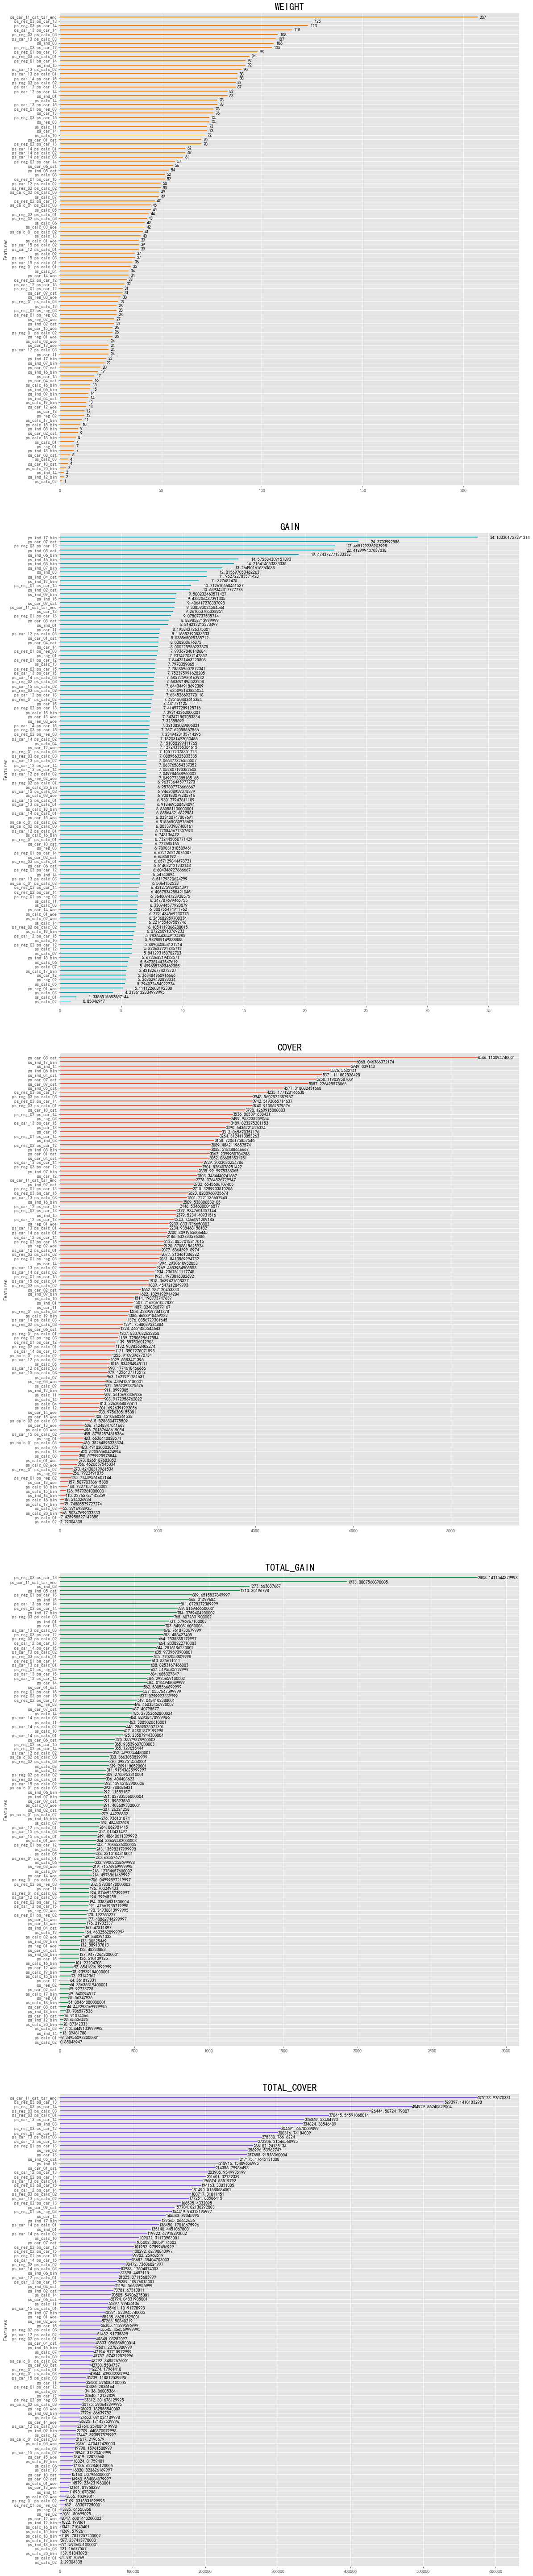

In [49]:
# define subplot grid
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 80))
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)

types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
# loop through tickers and axes
colors = ['#ff7f01','#08aebd','#fc5531','#139948','#8950fe']
for ty, ax, color in zip(types, axs.ravel(), colors):
    # filter df for ticker and plot on specified axes
    plot_importance(ax = ax, booster = model,importance_type=ty, color = color)

    # chart formatting
    ax.set_title(ty.upper(),fontsize = 22)
    ax.set_xlabel("")

plt.show()

<div class="alert alert-block alert-success"><b>Step 8</b>: 
    
    
   - 'weight', 'gain', 'cover' 这三种衡量特征重要度的strategy区别是什么？
</div>

In [51]:
# 特征工程的strategy作为key，对应的变量名组成的list作为value
from sklearn.feature_selection import SelectFromModel
feat_dict = {}
for thres in ['median','mean','1.25*mean']:
    model_select = SelectFromModel(model, threshold=thres, prefit=True)
    print(f'筛选前总计：{X.shape[1]}个特征')
    n_features = model_select.transform(X.values).shape[1]
    print(f'筛选后总计： {n_features}个特征【{thres}】')
    print('#'*60)
    selected_vars = list(X.columns[model_select.get_support()])
    feat_dict[thres] = selected_vars

筛选前总计：110个特征
筛选后总计： 55个特征【median】
############################################################
筛选前总计：110个特征
筛选后总计： 28个特征【mean】
############################################################
筛选前总计：110个特征
筛选后总计： 13个特征【1.25*mean】
############################################################


In [52]:
for ty in types:
    feat_dict[ty] = list(model.get_booster().get_score(importance_type=ty).keys())

In [54]:
final_train = fullset.loc[train.index][feat_dict['mean']+['target']]
final_test = fullset.loc[test.index][feat_dict['mean']]

In [55]:
final_train.to_csv("final_train.csv")
final_test.to_csv("final_test.csv")